<a href="https://colab.research.google.com/github/ajag408/PokerClass/blob/main/preprocessing_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

#### use this to mount your drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


####  %cd into /content/drive/Shared\ drives/255Project/PokerClass   (u have to use % in front of command)

#### when saving changes, click on File -> Save a copy in GitHub.  Repo is "swetha1695/PokerClassification" and branch is "main"

In [3]:
%cd  /content/drive/Shared\ drives/255Project/PokerClass

/content/drive/Shared drives/255Project/PokerClass


In [4]:
!pwd

/content/drive/Shared drives/255Project/PokerClass


# Preprocessing


In [78]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn import feature_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [79]:
train = pd.read_csv('./Data/poker-hand-training-true.data', delimiter=",", dtype=int)
train.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
#print(train)
train.head()


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [80]:
train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000
mean,2.508817,6.995122,2.497781,7.014035,2.510296,7.013915,2.495981,6.942261,2.497381,6.962973,0.620817
std,1.116465,3.749832,1.121750,3.766965,1.123130,3.744858,1.115991,3.747086,1.118715,3.741463,0.786594
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [81]:
test = pd.read_csv('./Data/poker-hand-testing.data', delimiter=",")
test.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
#print(test)
test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [82]:
labels = pd.DataFrame()

In [83]:
train.drop(['CLASS'], axis=1)
labels = train['CLASS']

test.drop(['CLASS'], axis=1)
test_labels = test['CLASS']

## check missing values on the training set

In [84]:
train.isnull().any().any()

False

## check missing values on the testing set

In [85]:
test.isnull().any().any()

False

## check if any attributes have zero variance across instances (same value in all samples, these should therefore be considered meaningless)

In [86]:
print("training")
print(train.shape)
sel = feature_selection.VarianceThreshold()
train_variance = sel.fit_transform(train)

train = pd.DataFrame(train_variance)
print(train.shape)

print('\n')
print("testing")
print(test.shape)

test_variance = sel.fit_transform(test)

test = pd.DataFrame(test_variance)
print(test.shape)



training
(25009, 11)
(25009, 11)


testing
(999999, 11)
(999999, 11)


## correlation of features to image class

In [38]:
corr_matrix = train.corr().abs()
print(corr_matrix[10].sort_values(ascending=False))

10    1.000000
7     0.009612
0     0.008838
5     0.006951
3     0.005653
8     0.005059
4     0.004533
1     0.001976
9     0.001741
6     0.000984
2     0.000569
Name: 10, dtype: float64


## All features seem to have very low corelation to target
## visualize correlation

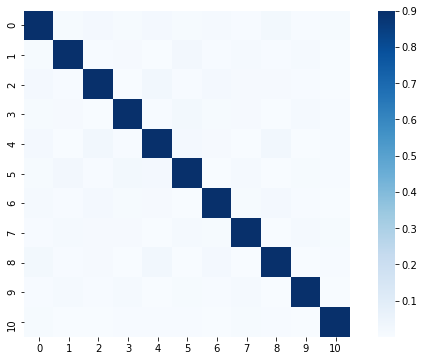

In [39]:
corr_matrix = train.corr().abs()
plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, vmax=0.9, cmap="Blues", square=True)

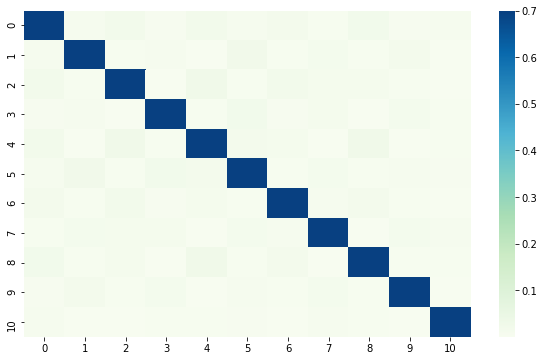

In [40]:
plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix,vmax = 0.7,cmap = "GnBu")

## check distribution of data

In [41]:
X_train = train.iloc[:,:10].copy()
X_test = test.iloc[:,:10].copy()

for col in X_train:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(X_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(X_train[col].kurt())  
         )

              0 Skewness: -0.01     Kurtosis: -01.36
              1 Skewness: -0.01     Kurtosis: -01.22
              2 Skewness: 00.00     Kurtosis: -01.37
              3 Skewness: -0.00     Kurtosis: -01.22
              4 Skewness: -0.01     Kurtosis: -01.37
              5 Skewness: -0.00     Kurtosis: -01.22
              6 Skewness: 00.00     Kurtosis: -01.36
              7 Skewness: 00.01     Kurtosis: -01.22
              8 Skewness: -0.00     Kurtosis: -01.36
              9 Skewness: 00.01     Kurtosis: -01.21


## using StandardScaler for standardization since distribution seems approximately normal

In [87]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

for col in X_train:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(X_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(X_train[col].kurt())  
         )

              0 Skewness: 00.00     Kurtosis: -01.33
              1 Skewness: -0.00     Kurtosis: -01.21
              2 Skewness: 00.02     Kurtosis: -01.35
              3 Skewness: -0.00     Kurtosis: -01.23
              4 Skewness: 00.01     Kurtosis: -01.36
              5 Skewness: -0.00     Kurtosis: -01.22
              6 Skewness: 00.04     Kurtosis: -01.35
              7 Skewness: 00.00     Kurtosis: -01.22
              8 Skewness: 00.01     Kurtosis: -01.35
              9 Skewness: 00.01     Kurtosis: -01.19
             10 Skewness: 03.07     Kurtosis: 010.19


## Smote for fixing data imbalance 

In [88]:
def balance_data(training_data, training_classes):
  training_data = np.array(training_data)
  training_classes = np.array(training_classes)

  before = Counter(training_classes)
  print("Before: ", before)
  strategy = dict(before)
  avg = round(sum(strategy.values()) / len(strategy)  / len(strategy) )
  for i, j in strategy.items():
    if j < avg:
      strategy[i] = j + avg
  sc = SMOTE(sampling_strategy=strategy, random_state=101,k_neighbors=2,kind="regular")
  X_balanced, y_balanced = sc.fit_sample(training_data, training_classes)
  print("After: ", Counter(y_balanced))
  return X_balanced, y_balanced 

## we balance the training data by oversampling the minority data samples 

In [89]:
X_train, y_train = balance_data(train, labels)
X_train.shape

Before:  Counter({0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 93, 5: 54, 6: 36, 7: 6, 8: 5, 9: 4})
After:  Counter({0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 343, 5: 304, 6: 286, 7: 256, 8: 255, 9: 254})


(26509, 11)

In [90]:
X_test, y_test = balance_data(test, test_labels)
X_test.shape

Before:  Counter({0: 501208, 1: 422498, 2: 47622, 3: 21121, 4: 3885, 5: 1996, 6: 1424, 7: 230, 8: 12, 9: 3})
After:  Counter({0: 501208, 1: 422498, 2: 47622, 3: 21121, 4: 13885, 5: 11996, 6: 11424, 7: 10230, 8: 10012, 9: 10003})


(1059999, 11)

## Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer, accuracy_score
import sklearn.model_selection as model_selection

# Variables for average classification report for each model
originalclass = []
predictedclass = []

In [111]:
#define custom scoring function to feed into cross_val
def classification_report_w_accuracy(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [113]:
#cross-validation: use for each model
clf = RandomForestClassifier()
model_selection.cross_val_score(clf, X_train, y_train, cv = 5, scoring = make_scorer(classification_report_w_accuracy))
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24986
           1       1.00      1.00      1.00     21198
           2       0.99      1.00      1.00      2412
           3       0.97      0.99      0.98      1026
           4       1.00      0.96      0.98       686
           5       0.99      1.00      1.00       608
           6       1.00      0.99      0.99       572
           7       1.00      0.99      1.00       512
           8       1.00      0.99      1.00       510
           9       1.00      1.00      1.00       508

    accuracy                           1.00     53018
   macro avg       1.00      0.99      0.99     53018
weighted avg       1.00      1.00      1.00     53018



In [ ]:
#insert other classifiers here (#kNN, NeuralNetwork, etc.)

#Select Best Model, then do following

In [108]:
#(we should only fit to all the training data at very end after we select our model; helps with generalizability and 
#overfitting)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
#(we should only predict for test at very end after we select our model; helps with generalizability and 
#overfitting)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    501208
           1       1.00      1.00      1.00    422498
           2       0.99      1.00      1.00     47622
           3       0.77      1.00      0.87     21121
           4       0.81      0.89      0.85     13885
           5       0.57      1.00      0.73     11996
           6       0.52      0.62      0.56     11424
           7       1.00      0.09      0.16     10230
           8       0.74      0.63      0.68     10012
           9       0.67      0.10      0.17     10003

    accuracy                           0.97   1059999
   macro avg       0.81      0.73      0.70   1059999
weighted avg       0.98      0.97      0.97   1059999

